# [Columbia - Lede Program] - Analysis on Speed tickets for Massechusets


Using data on citations for speeding from Massechusets from 2001. This data was originally analyzed by the Boston Globe for their series "Speed Trap: Who gets a ticket, who gets a break"

Below is a link for their methodology and the original dataset:
http://archive.boston.com/globe/metro/packages/tickets/study.pdf


##Purpose: 
Explore multivariable regression for a real world problem

##Interesting fact about the data:
For a brief period of April and May 2001, the state government entered both tickets and warnings from the paper citations. In Massechusets at that time, both were written on the same form, with only a checkbox indicating which it was. A ticket means a fine and a raises your insurance premium. A warning means nothing. 

##Research question: 
With similar circumstances, are certain groups of people likely to get tickets or warnings?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tw_un = pd.read_csv('tickets-warnings.csv')
tw_un.head(3)

,TYPE,CITATION,DATE,DOW,AGENCY,AGENCY2,AGENCY3,LOCAL,OFFICER,LICSTATE,...,V_YEAR,V_AGE,V_AGEGRP,COLOR,HOMESTATE,HOMETOWN,INTOWN,INSTATE,INTOWN2,INSTATE2
0,T,K0001506,20010411.0,Wednesday,State Police Troop A-4,State Police,S,N,8.247791e+15,MA,...,0.0,NaN,U,NaN,MA,Tewksbury,N,Y,0.0,1.0
1,T,K0001507,20010417.0,Tuesday,State Police Troop A-4,State Police,S,N,8.247791e+15,MA,...,1988.0,13.0,older,WHITE,MA,Boston,N,Y,0.0,1.0
2,T,K0001509,20010420.0,Friday,State Police Troop A-4,State Police,S,N,8.247791e+15,NH,...,0.0,NaN,U,NaN,NH,NaN,N,N,0.0,0.0


##Selecting certain fields for our research question: subsetting dataset to select only those rows where the description is "SPEEDING". Then certain rows selected based on their relevance to the issue (explore methodology to learn other possible features) 
'DATE', 'TYPE', 'AGENCY3', 'SEX','MINORITY','AGE','MPH','MPHOVER','INTOWN'

In [8]:
tw = tw[tw_un['DESCRIPT']=='SPEEDING'].reset_index(drop=True)
tw = tw[['DATE', 'TYPE', 'AGENCY3', 'SEX','MINORITY','AGE','MPH','MPHOVER','INTOWN']]
tw.head()

,DATE,TYPE,AGENCY3,SEX,MINORITY,AGE,MPH,MPHOVER,INTOWN
0,20010411.0,T,S,M,W,21.0,80.0,15.0,N
1,20010427.0,T,S,M,W,24.0,85.0,20.0,N
2,20010502.0,T,S,M,W,37.0,80.0,30.0,N
3,20010506.0,W,S,M,W,30.0,80.0,15.0,N
4,20010506.0,W,S,F,M,22.0,75.0,10.0,N


In [9]:
tw.groupby('MINORITY').count()  # 12836/(12836+79275)= 0.139, 13.9 % citations given to minorities

,DATE,TYPE,AGENCY3,SEX,AGE,MPH,MPHOVER,INTOWN
MINORITY,,,,,,,,
M,12836,12836,12836,12836,12833,12836,12609,12836
U,1633,1633,1633,1633,1632,1633,1592,1633
W,79275,79275,79275,79275,79262,79275,78071,79275


In [10]:
# drop the unknown race entries
tw = tw[tw['MINORITY'] != 'U'].reset_index(drop=True)  # renumber the rows, and don't create a new column

In [11]:
sz = tw.groupby(['MINORITY','TYPE']).size()
sz

MINORITY  TYPE
M         T        7731
          W        5105
W         T       40126
          W       39149
dtype: int64

In [12]:
pd.crosstab(tw.MINORITY,tw.TYPE)

TYPE,T,W
MINORITY,,
M,7731,5105
W,40126,39149


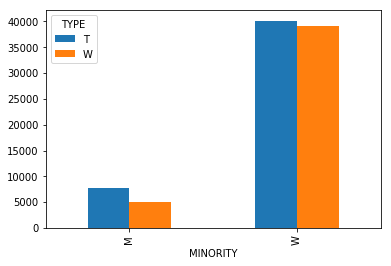

In [13]:
pd.crosstab(tw.MINORITY,tw.TYPE).plot(kind='bar')

In [14]:
# percent of minority citations which were tickets
sz['M']['T'] / sum(sz['M'])

0.6022904331567467

In [15]:
# percent of non-minority citations which were tickets
sz['W']['T'] / sum(sz['W'])

0.5061620939766636

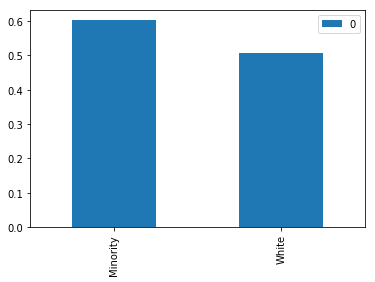

In [16]:
pd.DataFrame([sz['M']['T'] / sum(sz['M']), sz['W']['T'] / sum(sz['W'])], index=['Minority','White']).plot(kind='bar')

 checking speed limit and speed

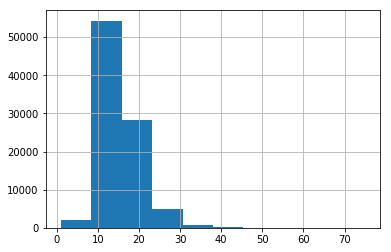

In [17]:
tw['MPHOVER'].hist()

In [ ]:
tw['MPH'].hist()

checking speed over limit for both white and minority categories

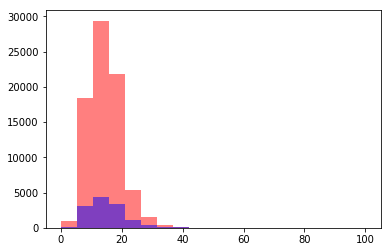

In [22]:
w_over = tw[tw['MINORITY']=='W']['MPHOVER'].dropna()  # need dropna because some rows don't record speed
m_over = tw[tw['MINORITY']=='M']['MPHOVER'].dropna()

bins = np.linspace(0, 100, 20)
plt.hist(w_over,bins,alpha=0.5, color='red', label='White')  # Red for White category 
plt.hist(m_over,bins,alpha=0.5, color='blue', label='Blue') # Blue for Minority category
plt.show()

 But point to keep in mind here is that the scales are not the same! need to normalize and then compare

(array([2.20001586e-03, 4.55674518e-02, 6.66936315e-02, 5.09318741e-02,
        1.58973749e-02, 5.50003965e-03, 2.03426124e-03, 6.78087081e-04,
        3.01372036e-04, 9.04116108e-05, 4.52058054e-05, 3.01372036e-05,
        0.00000000e+00, 1.50686018e-05, 1.50686018e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
         21.05263158,  26.31578947,  31.57894737,  36.84210526,
         42.10526316,  47.36842105,  52.63157895,  57.89473684,
         63.15789474,  68.42105263,  73.68421053,  78.94736842,
         84.21052632,  89.47368421,  94.73684211, 100.        ]),
 <a list of 19 Patch objects>)

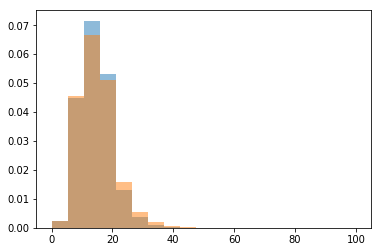

In [23]:
plt.hist(w_over,bins,alpha=0.5,density=True)
plt.hist(m_over,bins,alpha=0.5,density=True)


In [24]:
w_over.mean()

15.066798170895723

In [25]:
m_over.mean()

15.575303354746609

In [26]:
def comparehist(colname):
    w = tw[tw['MINORITY']=='W'][colname].dropna()
    m = tw[tw['MINORITY']=='M'][colname].dropna()
    
    if tw[colname].dtype == np.float64:
        # it's numeric, plot a histogram
        bins = np.linspace(0, 100, 20)
        plt.hist(w,bins,alpha=0.5,density=True)
        plt.hist(m,bins,alpha=0.5,density=True)
    else:
        # if not numerican, assume it's categorical and plot a bar chart of value counts normalized to percentages
        wc = w.value_counts()
        wc /= sum(wc)
        plt.bar(wc.index, wc, alpha=0.5)
        mc = m.value_counts()
        mc /= sum(mc)
        plt.bar(mc.index, mc, alpha=0.5)
        
    plt.title(colname)
    plt.show()


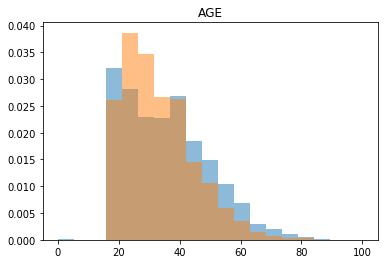

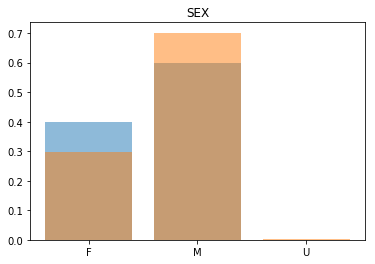

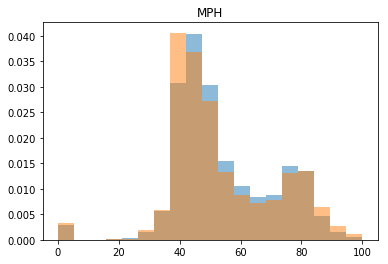

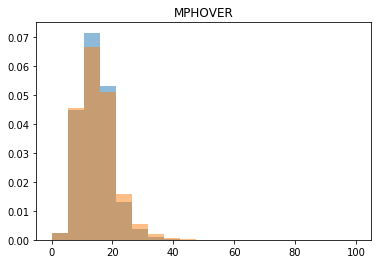

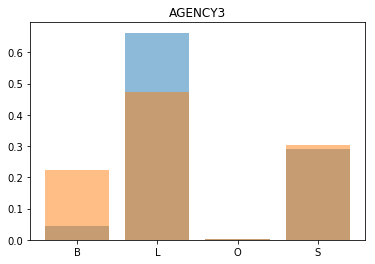

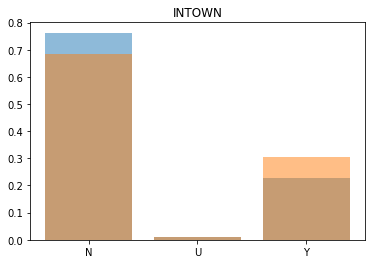

In [27]:
comparehist('AGE')
comparehist('SEX')
comparehist('MPH')
comparehist('MPHOVER')
comparehist('AGENCY3')
comparehist('INTOWN')

## Inferences from graphs
- The minority drivers in this sample have more people in their 20s, skew male
- They are going slightly faster when they're pulled over
- Are less likely to be stopped by local police
- More likely to be stopped by Boston police
- Tend to be out of town more often

Any or all of these effects could account for the difference in ticketing rates. 
There could even be interactions here: suppose Boston police are harder on people who drive more than 10 mph over the limit. 
These minority drivers are both more commonly in Boston and going faster on average.

## Enter logistic regression
Use regression to try to analyze the relationships between the variables and whether someone gets a ticket
Using this to answer a Yes/No question on whether they got a ticket or not?

In [28]:
from sklearn.linear_model import LinearRegression,LogisticRegression


In [30]:
# add a column that is 1 if they got a ticket (not a warning)
tw['BUSTED'] = tw['TYPE'].replace({'W':0, 'T':1})

# Remove rows where MPH is unknown
tw = tw[~tw['MPHOVER'].isnull()].reset_index()

In [31]:
# sort by MPHOVER (makes the plotting below simpler)
tw = tw.sort_values(by='MPHOVER')

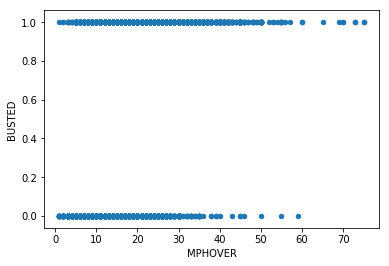

In [32]:
x = tw[['MPHOVER']].values
y = tw[['BUSTED']].values
tw.plot(kind='scatter',x='MPHOVER',y='BUSTED')

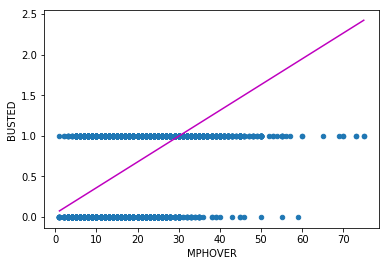

In [33]:
lm = LinearRegression()
lm.fit(x,y)
tw.plot(kind='scatter',x='MPHOVER',y='BUSTED')
plt.plot(x,lm.predict(x),'-',color='m')

you can imagine that whenever this line is 0.5 or greater, we guess "got a ticket." But really we should use a model that always predicts a value between 0 and 1 -- a probability. 
To do this we fit a "logistic" function, not a line. This is a function which is an S-shape, and turns any number into a number from 0 to 1

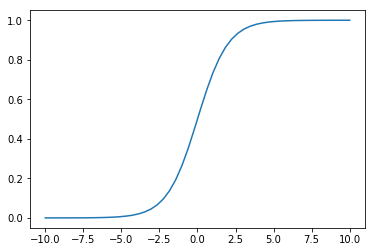

In [34]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

linear_range = np.linspace(-10,10)
plt.plot(linear_range, logistic(linear_range))

In [35]:
logistic(0)

0.5

C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


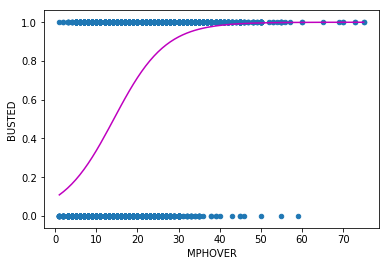

In [36]:
# Run the logistic regression on our data
lm = LogisticRegression()
lm.fit(x,y)

# plot original data
tw.plot(kind='scatter',x='MPHOVER',y='BUSTED')

# Now plot the prediction of the fitted model
m = lm.coef_[0]
b = lm.intercept_
line_y = m*x+b
prediction = logistic(line_y) 
plt.plot(x, prediction, '-', color='m')


We can do the same thing with the predict_proba function (though it returns two columns: one is the probability of FALSE and the other is the probability of TRUE, so we plot only the second column)

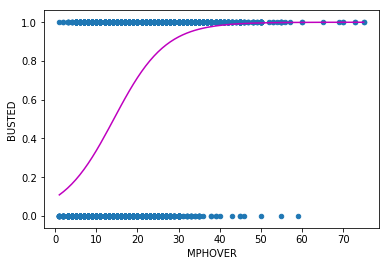

In [37]:
tw.plot(kind='scatter',x='MPHOVER',y='BUSTED')
plt.plot(x, lm.predict_proba(x)[:,1], '-', color='m')

## Odds ratios
Here's a useful fact: the "slope" coefficients of a logistic regression means something when the indepenent variable is binary: it's the odds ratio.
Suppose we have a dinner party where each person eats chicken or fish. But oh no! Some people got sick afterwards. To see if it was related to what they ate, we can calculate the odds ratio.

In [40]:
# To get the odds ratio, we use the following formula:
np.exp(lm.coef_)



array([[1.17220223]])

## Controlling for other variables
We can feed as many independent variables as we like into linear regression. With two variables, instead of fitting a plane to the data we are fitting a curved surface. 
But here's the cool thing: just like linear regression each coefficient tells us how much that independent variable effects the probability of getting a ticket if all other variables stay the same.
In [ ]:



In [42]:

# Code these variables a binary
tw.SEX = tw.SEX.replace({'M':0,'F':1, 'U':0})
tw.MINORITY = tw.MINORITY.replace({'W':0,'M':1})
tw.INTOWN = tw.INTOWN.replace({'N':0,'Y':1, 'U':0})

# remove unknown ages
tw = tw[~tw.AGE.isnull()].reset_index()

In [43]:
x = tw[['MPHOVER','MINORITY','SEX', 'AGE', 'INTOWN']].values
y = tw[['BUSTED']].values
lm = LogisticRegression() 
lm.fit(x,y)
       
# print out the odds ratios for each variable
np.exp(lm.coef_)

C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.16912683, 1.46125139, 0.72036031, 0.98509825, 0.50819743]])